In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Step option to show max columns
pd.pandas.set_option('display.max_columns',None)

### Step 0 - import dataset

In [2]:
train=pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/HousePrices/train.csv')

### Step 1 - Initial Inspection

In [3]:
# Check Head
train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [4]:
# Check Shape
train.shape

(1460, 81)

In [5]:
# Check % of null values
pctnull=train.isnull().sum()/train.shape[1]

In [6]:
# Check largest null value %
pctnull.nlargest(22)

PoolQC          17.938272
MiscFeature     17.358025
Alley           16.901235
Fence           14.555556
FireplaceQu      8.518519
LotFrontage      3.197531
GarageType       1.000000
GarageYrBlt      1.000000
GarageFinish     1.000000
GarageQual       1.000000
GarageCond       1.000000
BsmtExposure     0.469136
BsmtFinType2     0.469136
BsmtQual         0.456790
BsmtCond         0.456790
BsmtFinType1     0.456790
MasVnrType       0.098765
MasVnrArea       0.098765
Electrical       0.012346
Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
dtype: float64

In [7]:
#check info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#drop ID column as it does not mean anything
train.drop('Id',axis=1, inplace=True)

In [9]:
#check if that dropped the column
train.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [10]:
# this check tests if a particular column is an object (i.e. a string)
train.PavedDrive.dtype == 'O'

True

In [11]:
# Breakup into numerical and categorical data using a for loop to loop through entire list of categories
cat_list = []
num_list = []
for col in train.columns:
    if train[col].dtype=='O':
        cat_list.append(col)
    else:
        num_list.append(col)

In [12]:
#check categorical list
cat_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
#check numerical list
num_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
#define 2 new dataframes
train_num=train[num_list]
train_cat=train[cat_list]

In [15]:
#check numerical dataset head
train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [16]:
#create dataset for time data. We might do something with this later
train_time=train_num[['YearBuilt','YearRemodAdd', 'GarageYrBlt', 'YrSold']]

In [17]:
#check head of temporal dataset
train_time.head(2)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007

In [18]:
# now check if any of the numerical values are actualyy categorical
# for example, in titanic dataset, the PClass variable was only 3 times, it didn't have any numerical value
# This can be done by checking the number of unique values <20 (for example) in the entire column

num_discrete=[]
for col in train_num.columns:
    if len(train_num[col].unique()) < 25 and col not in train_time.columns: #also make sure its not in the temporal data
        num_discrete.append(col)
    else:
        pass

In [19]:
#check the list of discrete numerical variables
num_discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [20]:
#create a new dataset of the discrete numerical variables
train_numdisc=train[num_discrete]

In [21]:
#remove these columns from the numerical dataset as they will be treated as categorical
train_num.drop(num_discrete,axis=1,inplace=True)

/var/folders/dv/wd_fn1ws4l18t7p_tt04f3d00000gn/T/ipykernel_9720/4012199734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num.drop(num_discrete,axis=1,inplace=True)


In [22]:
#check dataset head
train_num.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0           0        150          856       856       854       1710   
1           0        284         1262      1262         0       1262   
2           0        434          920       920       866       1786   
3           0        540          756       961       756       1717   
4           0        490         1145      1145      1053       2198   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0       2003.0         548           0           61              0   
1       1976.0         460         298            0              0   
2       2001.0         608           0           42              0   
3       1998.0         642           0           35            272   
4       2000.0         836         192           84              0   

   ScreenPorch  YrSold  SalePrice  
0            0    2008     208500  
1            0    2007     181500  
2            0    2008     223500  
3            0    2006     140000  
4            0    2008     250000

In [23]:
#re-define the categorical dataset to include this data
train_cat=pd.merge(train_cat,train_numdisc,left_index=True, right_index=True)

In [24]:
#check categorical dataset head
train_cat.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  MSSubClass  OverallQual  OverallCond  LowQualFinSF  \
0       WD        Normal          60            7            5             0   
1       WD        Normal          20            6            8             0   
2       WD        Normal          60            7            5             0   
3       WD       Abnorml          70            7            5             0   
4       WD        Normal          60            8            5             0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0             8           0           2          0         0        0       2  
1             6           1           2          0         0        0       5  
2             6           1           2       

### Step 2 - EDA on numerical data

In [25]:
#describe the dataset
train_num.describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1201.000000    1460.000000  1460.000000   1460.000000  1452.000000   
mean     70.049958   10516.828082  1971.267808   1984.865753   103.685262   
std      24.284752    9981.264932    30.202904     20.645407   181.066207   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      59.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      80.000000   11601.500000  2000.000000   2004.000000   166.000000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  GarageYrBlt   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean    346.992466  1515.463699  1978.506164   472.980137    94.244521   
std     436.528436   525.480383    24.689725   213.804841   125.338794   
min       0.000000   334.000000  1900.000000     0.000000     0.000000   
25%       0.000000  1129.500000  1961.000000   334.500000     0.000000   
50%       0.000000  1464.000000  1980.000000   480.000000     0.000000   
75%     728.000000  1776.750000  2002.000000   576.000000   168.000000   
max    2065.000000  5642.000000  2010.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch  ScreenPorch       YrSold      SalePrice  
count  1460.000000    1460.000000  1460.000000  1460.000000    1460.000000  
mean     46.660274      21.954110    15.060959  2007.815753  180921.195890  
std      66.256028      61.119149    55.757415     1.328095   79442.502883  
min       0.000000       0.000000     0.000000  2006.000000   34900.000000  
25%       0.000000       0.000000     0.000000  2007.000000  129975.000000  
50%      25.000000       0.000000     0.000000  2008.000000  163000.000000  
75%      68.000000       0.000000     0.000000  2009.000000  214000.000000  
max     547.000000     552.000000   480.000000  2010.000000  755000.000000

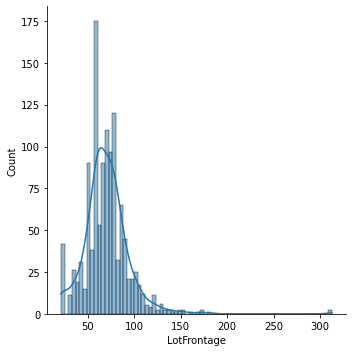

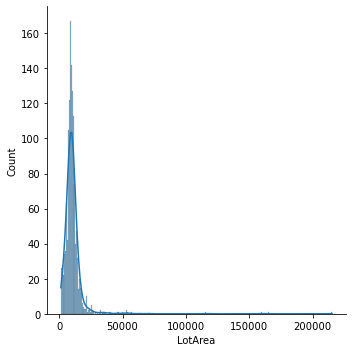

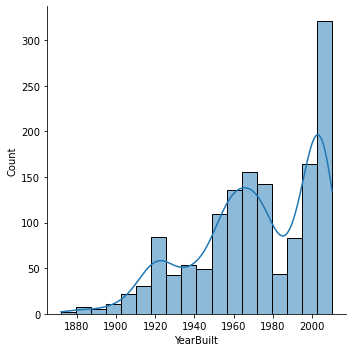

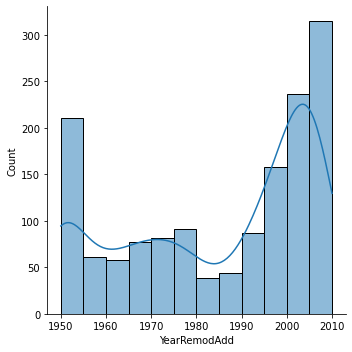

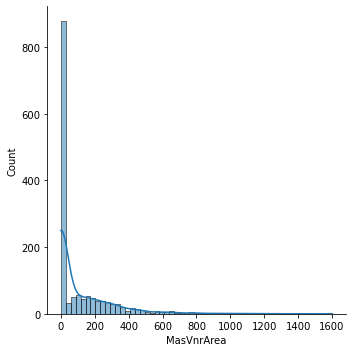

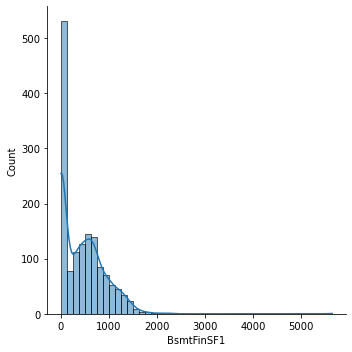

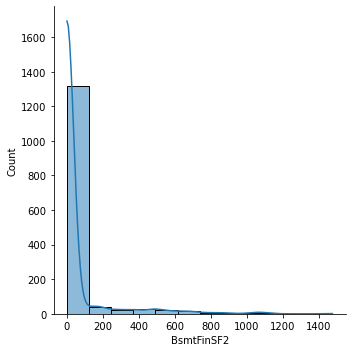

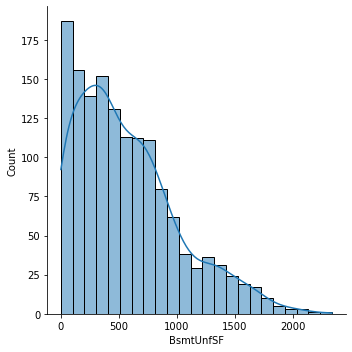

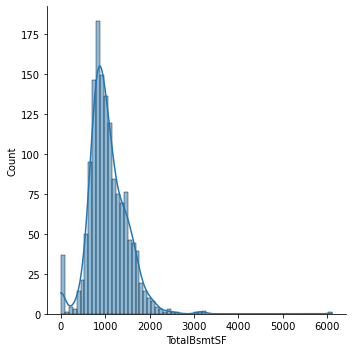

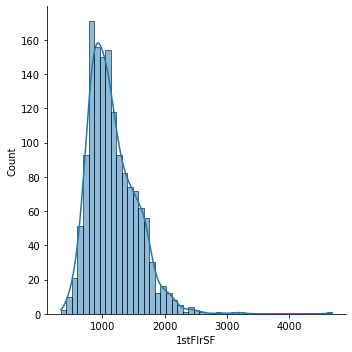

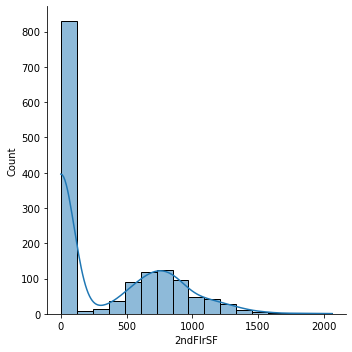

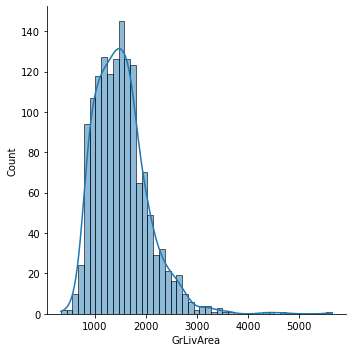

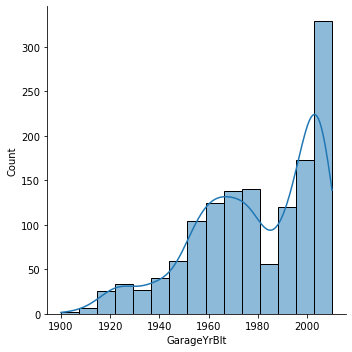

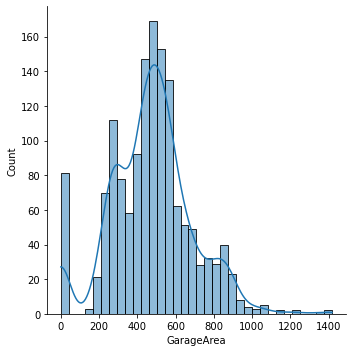

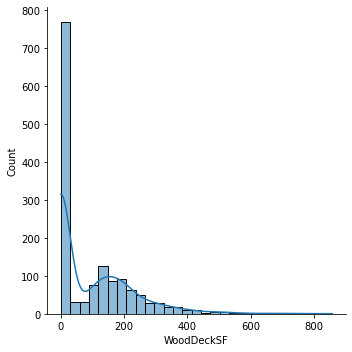

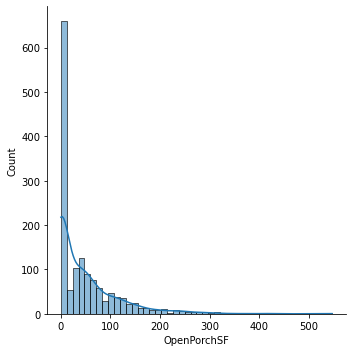

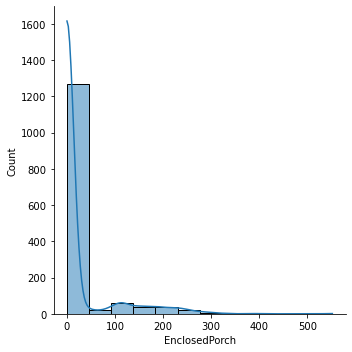

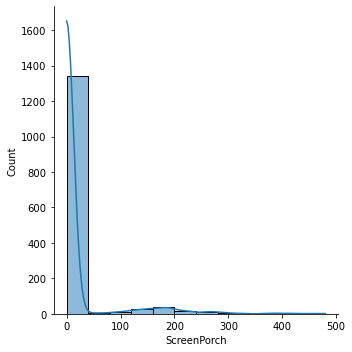

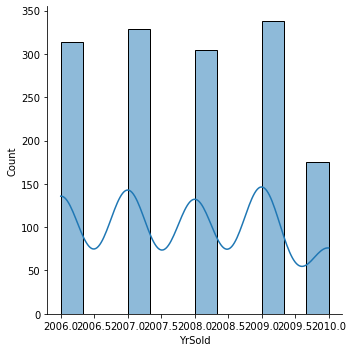

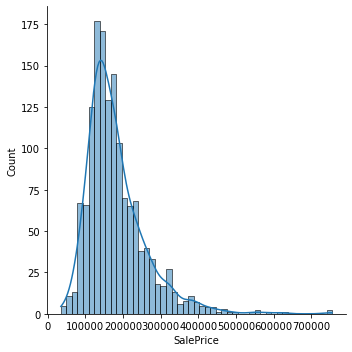

In [26]:
#create histograms of the data using a for loop
for col in train_num.columns:
    sns.displot(train_num[col],kde=True)

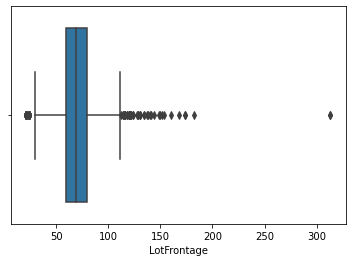

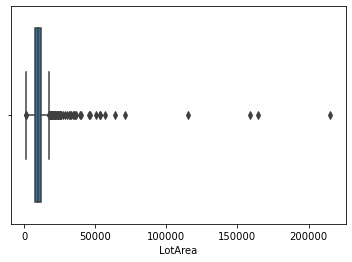

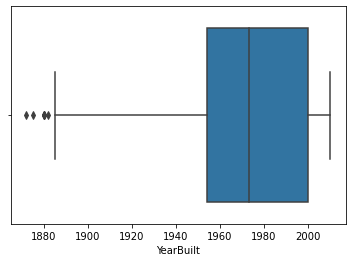

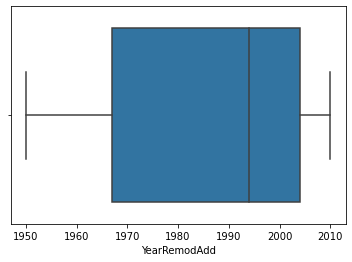

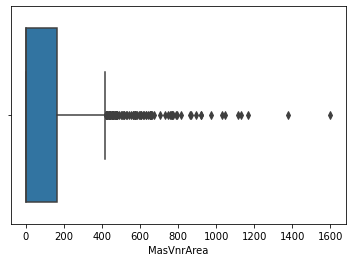

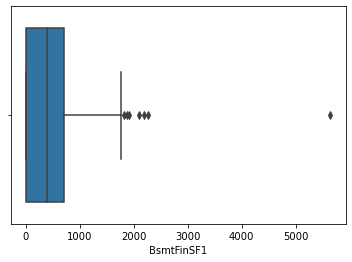

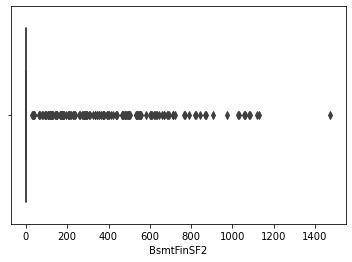

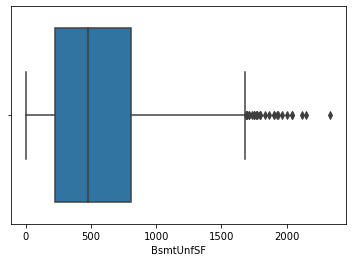

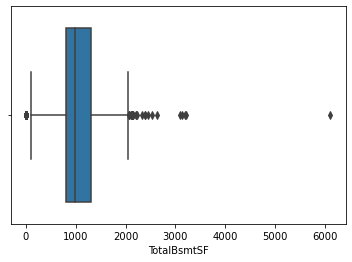

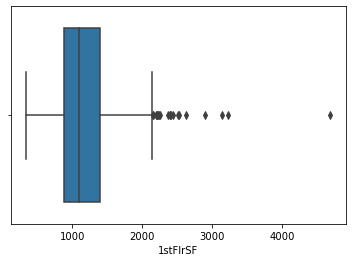

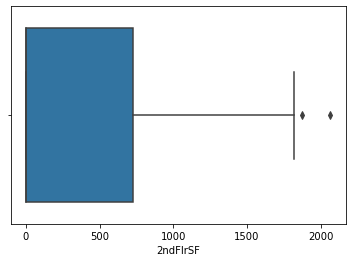

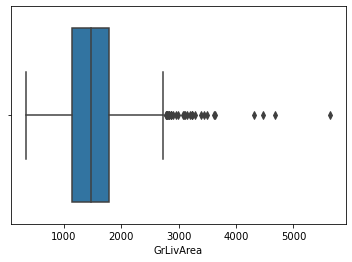

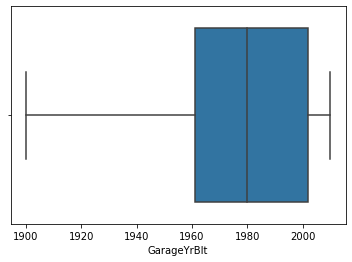

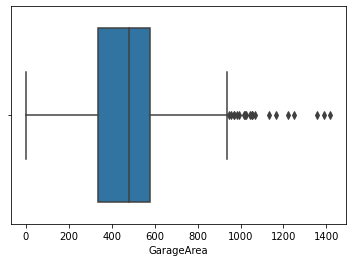

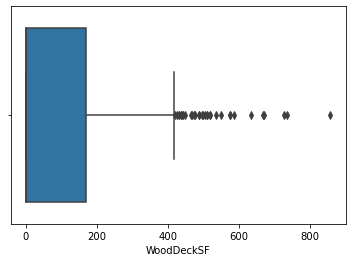

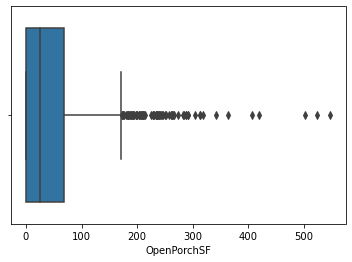

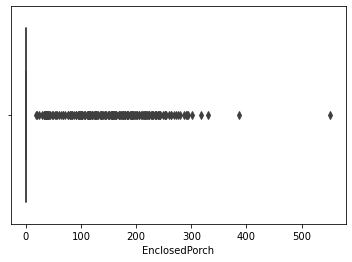

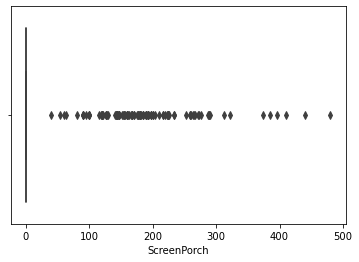

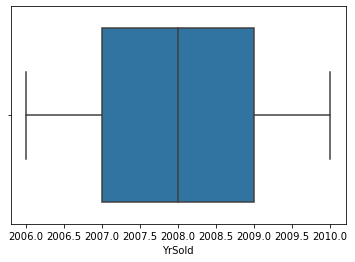

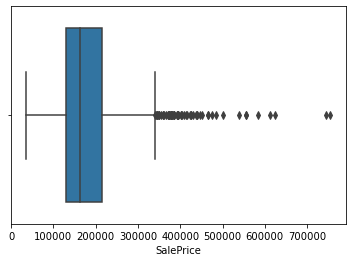

In [27]:
#create Boxplots of the data using a for loop to understand the mean, and spread
for col in train_num.columns:
    sns.boxplot(x=train_num[col])
    plt.show()

In [28]:
#check correlations and draw a heat map
train_num.corr()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.426095   0.123349      0.088866    0.193458   
LotArea           0.426095  1.000000   0.014228      0.013788    0.104160   
YearBuilt         0.123349  0.014228   1.000000      0.592855    0.315707   
YearRemodAdd      0.088866  0.013788   0.592855      1.000000    0.179618   
MasVnrArea        0.193458  0.104160   0.315707      0.179618    1.000000   
BsmtFinSF1        0.233633  0.214103   0.249503      0.128451    0.264736   
BsmtFinSF2        0.049900  0.111170  -0.049107     -0.067759   -0.072319   
BsmtUnfSF         0.132644 -0.002618   0.149040      0.181133    0.114442   
TotalBsmtSF       0.392075  0.260833   0.391452      0.291066    0.363936   
1stFlrSF          0.457181  0.299475   0.281986      0.240379    0.344501   
2ndFlrSF          0.080177  0.050986   0.010308      0.140024    0.174561   
GrLivArea         0.402797  0.263116   0.199010      0.287389    0.390857   
GarageYrBlt       0.070250 -0.024947   0.825667      0.642277    0.252691   
GarageArea        0.344997  0.180403   0.478954      0.371600    0.373066   
WoodDeckSF        0.088521  0.171698   0.224880      0.205726    0.159718   
OpenPorchSF       0.151972  0.084774   0.188686      0.226298    0.125703   
EnclosedPorch     0.010700 -0.018340  -0.387268     -0.193919   -0.110204   
ScreenPorch       0.041383  0.043160  -0.050364     -0.038740    0.061466   
YrSold            0.007450 -0.014261  -0.013618      0.035743   -0.008201   
SalePrice         0.351799  0.263843   0.522897      0.507101    0.477493   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage      0.233633    0.049900   0.132644     0.392075  0.457181   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475   
YearBuilt        0.249503   -0.049107   0.149040     0.391452  0.281986   
YearRemodAdd     0.128451   -0.067759   0.181133     0.291066  0.240379   
MasVnrArea       0.264736   -0.072319   0.114442     0.363936  0.344501   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024   
GarageYrBlt      0.153484   -0.088011   0.190708     0.322445  0.233449   
GarageArea       0.296970   -0.018227   0.183303     0.486665  0.489782   
WoodDeckSF       0.204306    0.067898  -0.005316     0.232019  0.235459   
OpenPorchSF      0.111761    0.003093   0.129005     0.247264  0.211671   
EnclosedPorch   -0.102303    0.036543  -0.002538    -0.095478 -0.065292   
ScreenPorch      0.062021    0.088871  -0.012579     0.084489  0.088758   
YrSold           0.014359    0.031706  -0.041258    -0.014969 -0.013604   
SalePrice        0.386420   -0.011378   0.214479     0.613581  0.605852   

               2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  \
LotFrontage    0.080177   0.402797     0.070250    0.344997    0.088521   
LotArea        0.050986   0.263116    -0.024947    0.180403    0.171698   
YearBuilt      0.010308   0.199010     0.825667    0.478954    0.224880   
YearRemodAdd   0.140024   0.287389     0.642277    0.371600    0.205726   
MasVnrArea     0.174561   0.390857     0.252691    0.373066    0.159718   
BsmtFinSF1    -0.137079   0.208171     0.153484    0.296970    0.204306   
BsmtFinSF2    -0.099260  -0.009640    -0.088011   -0.018227    0.067898   
BsmtUnfSF      0.004469   0.240257     0.190708    0.183303   -0.005316   
TotalBsmtSF   -0.174512   0.454868     0.322445    0.486665    0.232019   
1stFlrSF      -0.202646   0.566024     0.233449    0.489782    0.235459

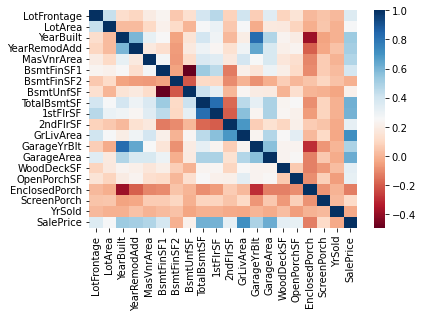

<Figure size 2160x2160 with 0 Axes>

In [29]:
#draw plot
sns.heatmap(train_num.corr(),cmap='RdBu')
plt.figure(figsize=(30,30))
plt.show()

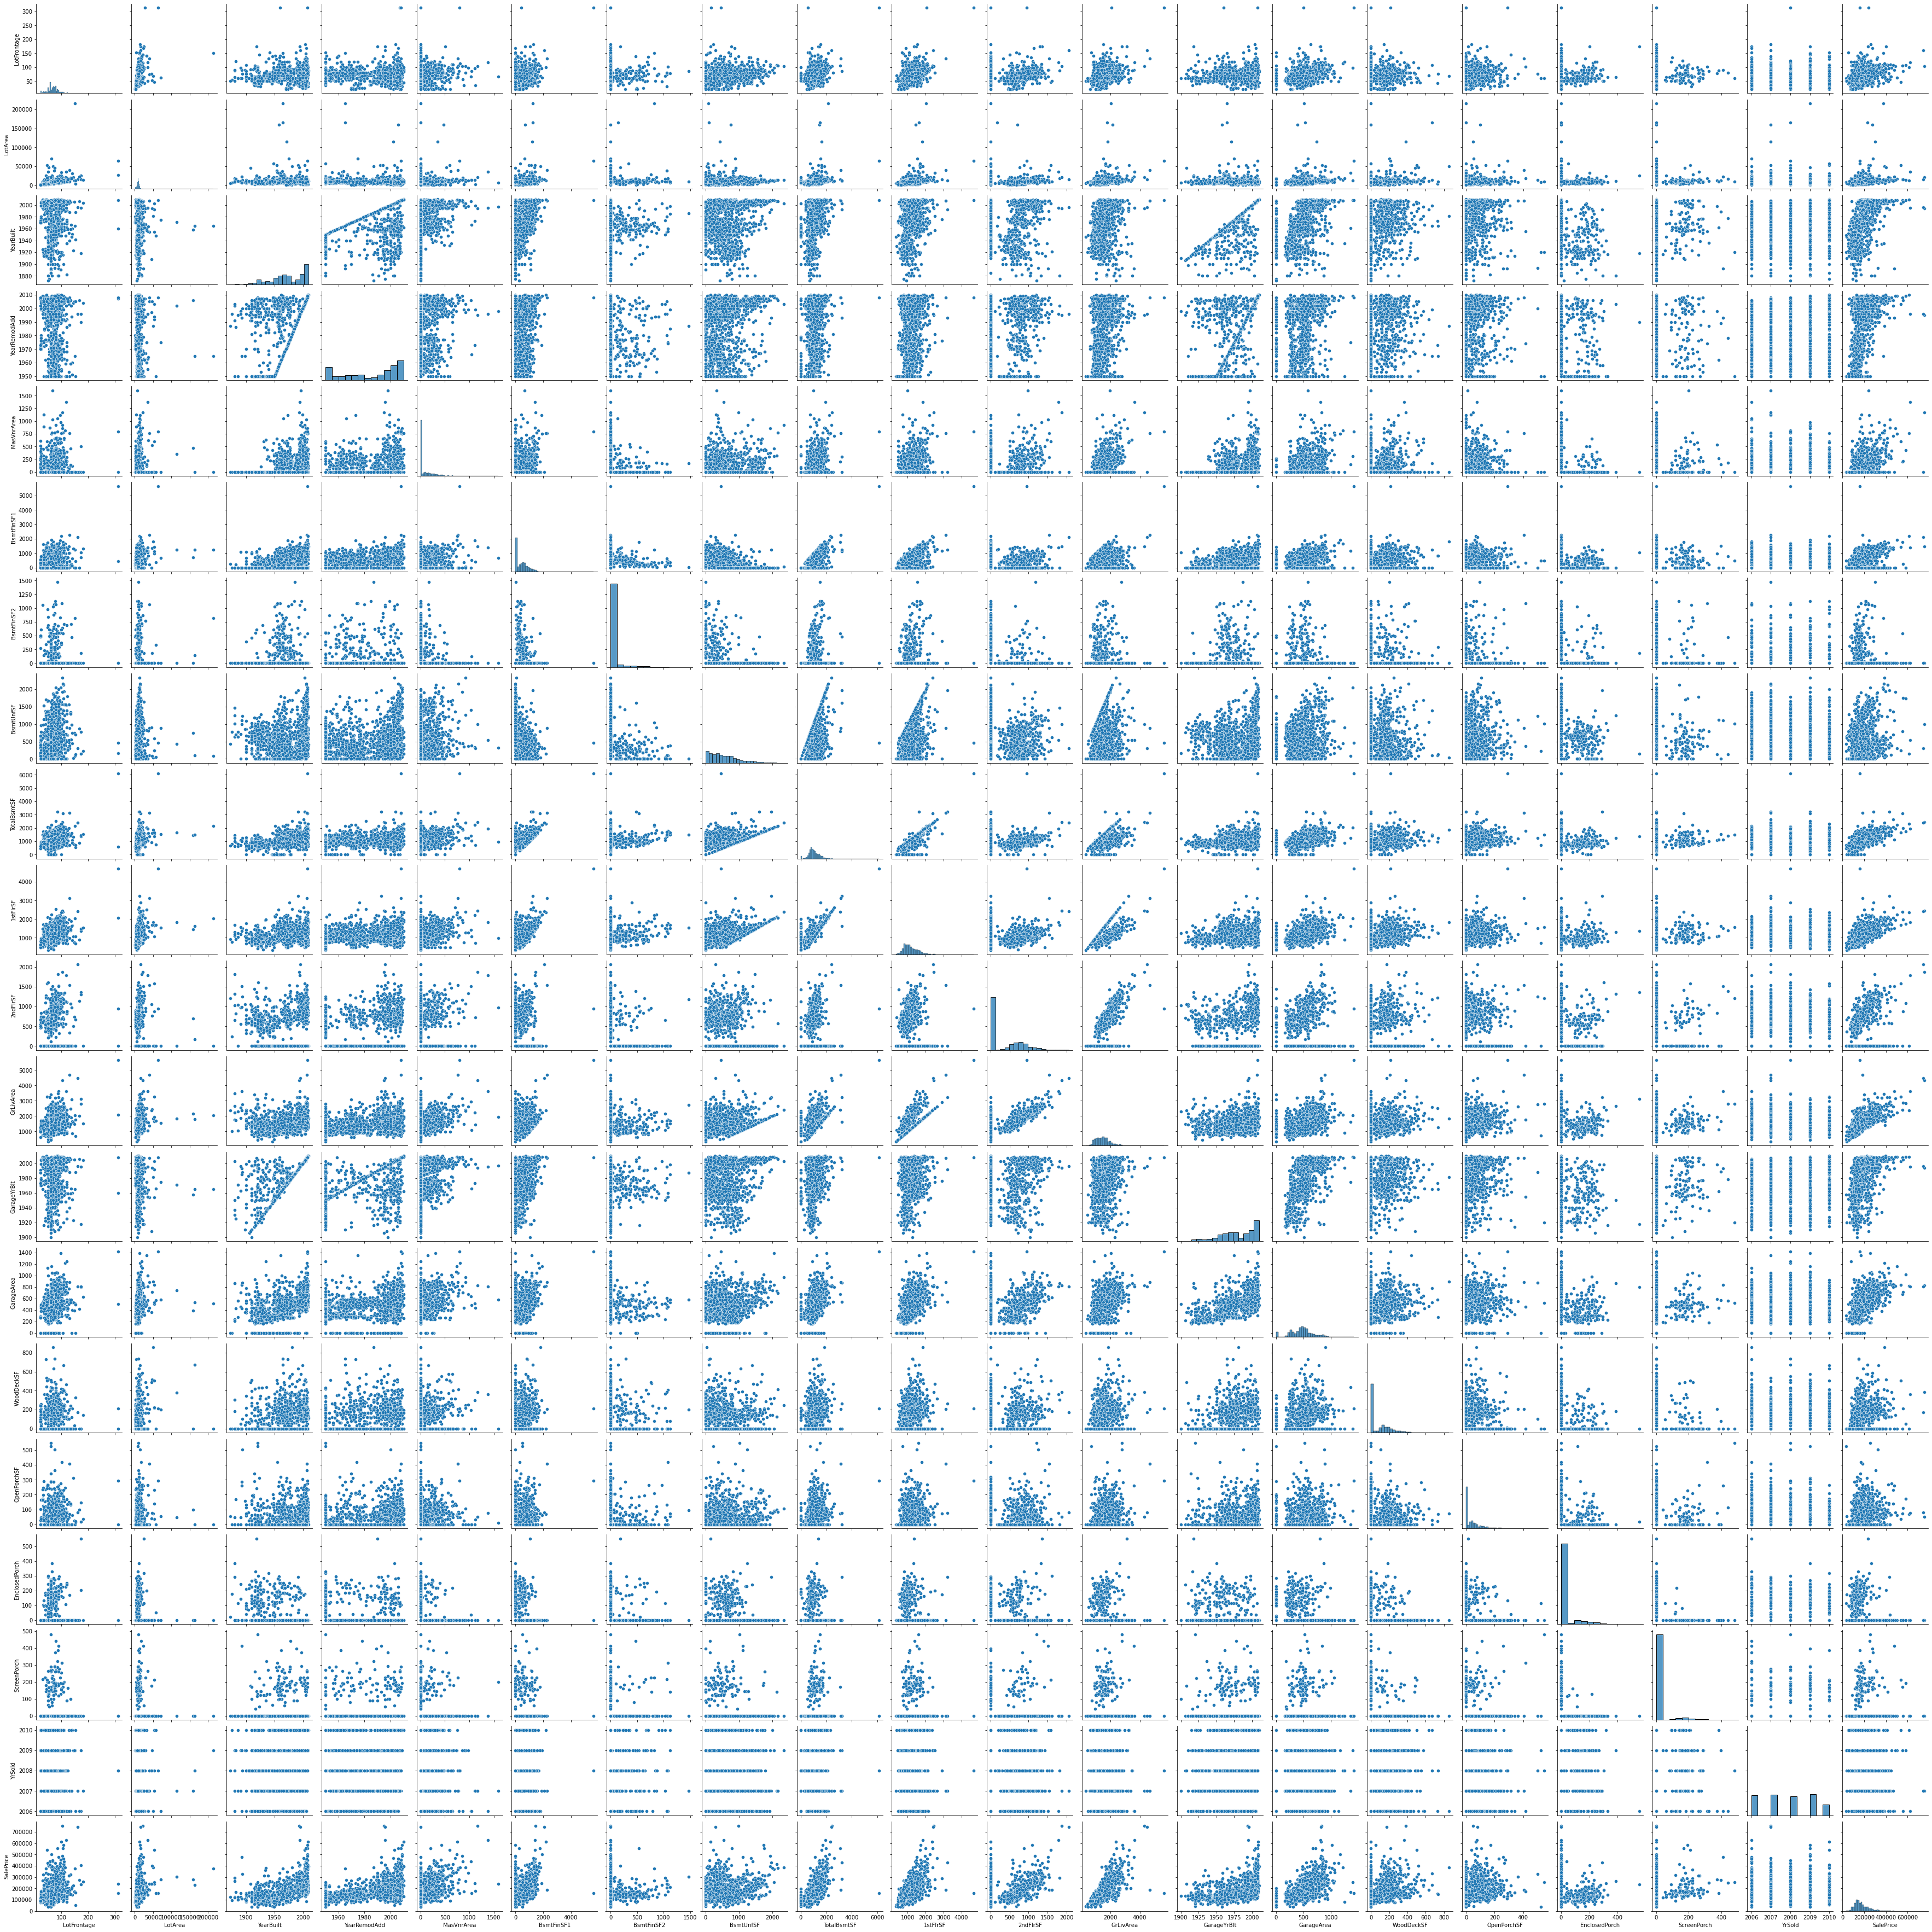

In [30]:
#create pair plots
sns.pairplot(train_num)
plt.show()

### Step 3 - EDA on categorical variables

In [31]:
#check column list
train_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold'],
      dtype='object')

In [32]:
#check value count for 1 variable to test
train_cat.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

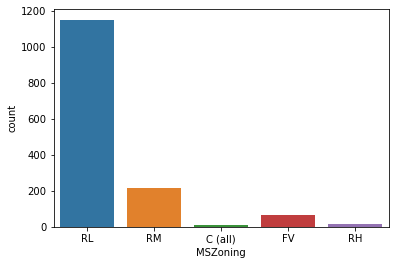

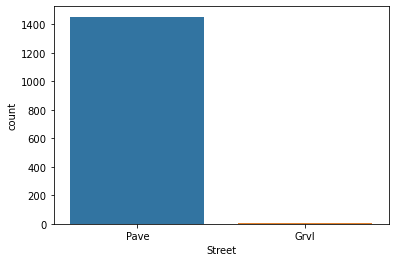

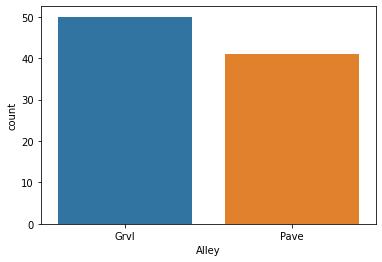

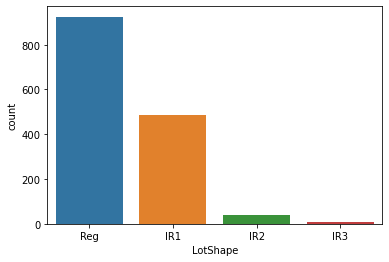

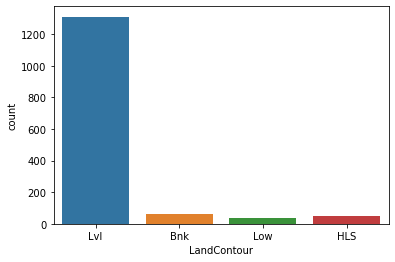

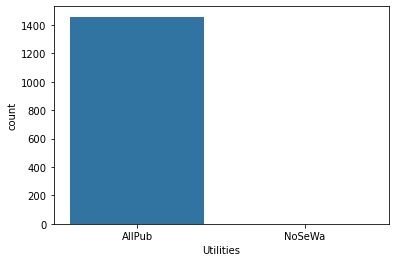

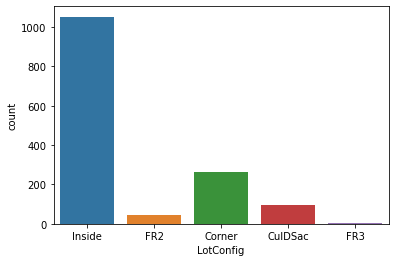

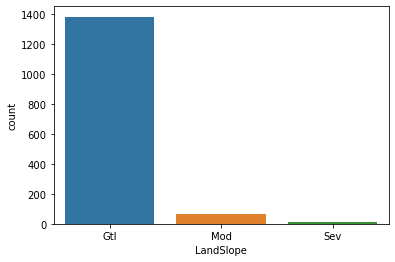

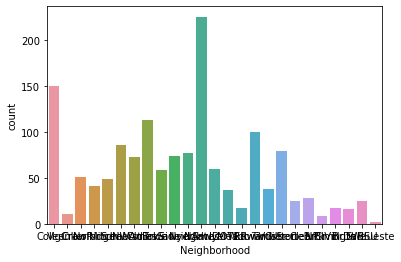

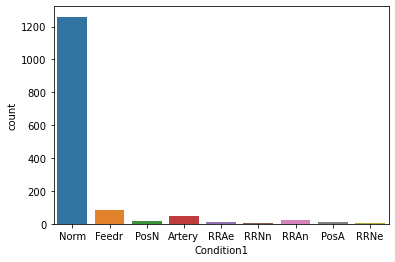

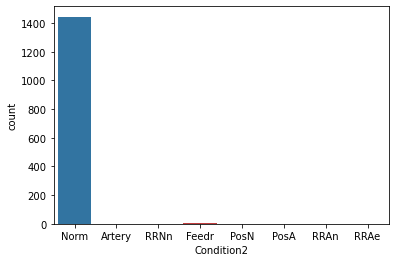

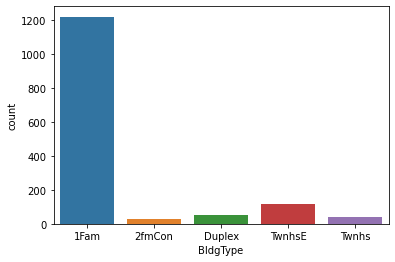

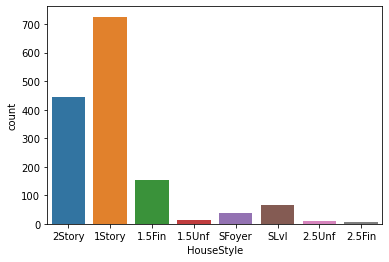

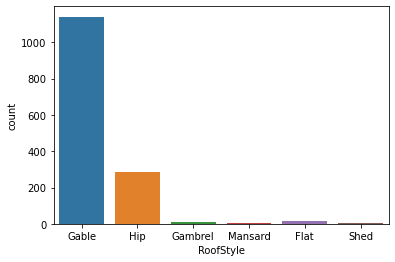

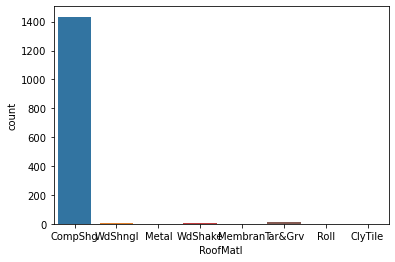

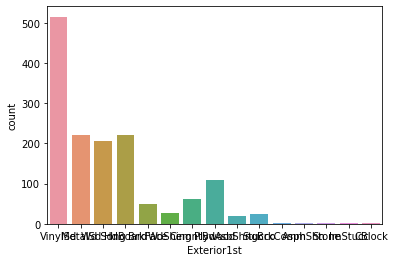

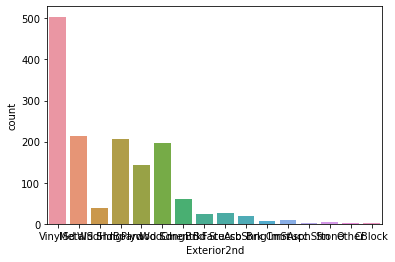

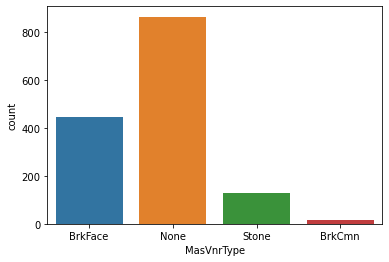

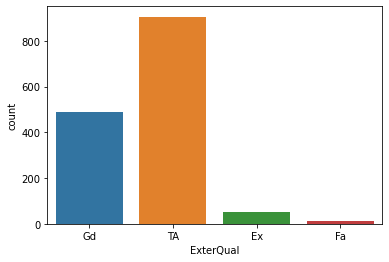

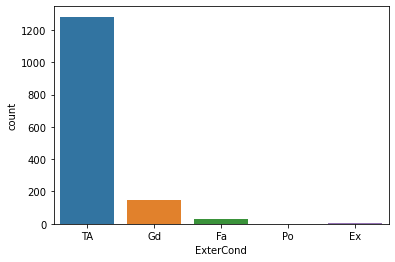

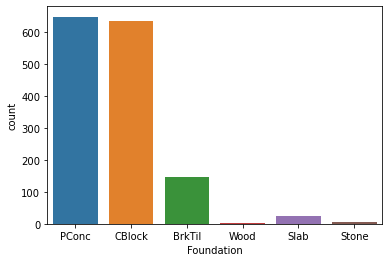

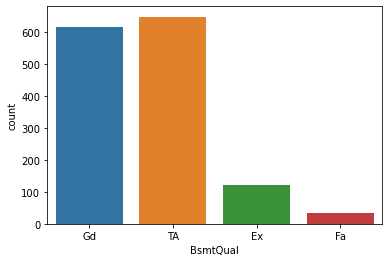

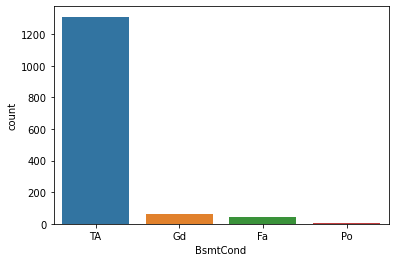

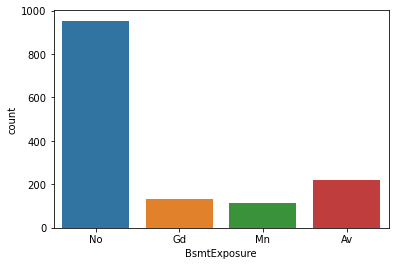

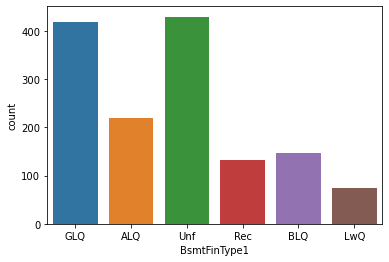

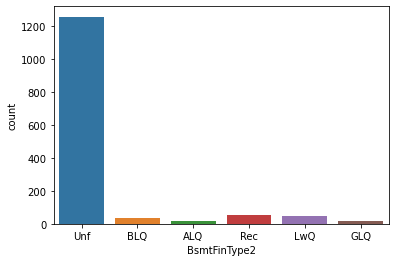

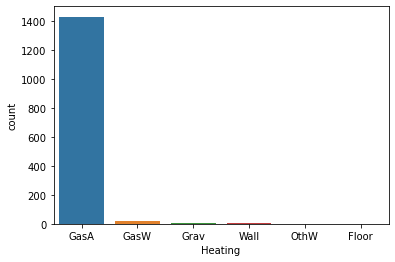

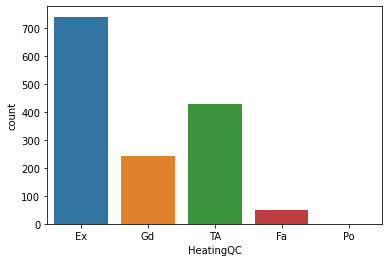

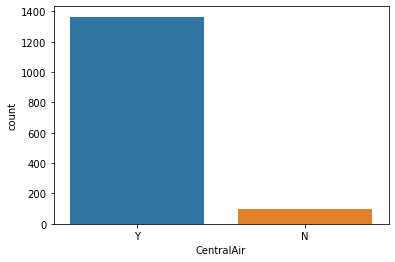

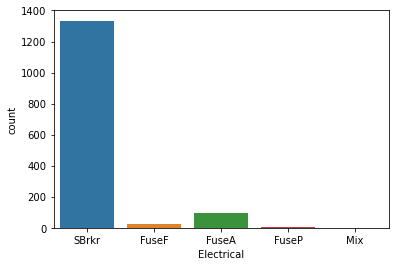

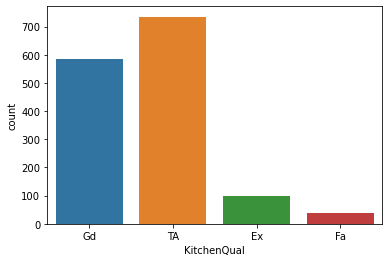

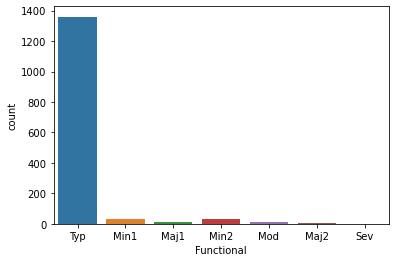

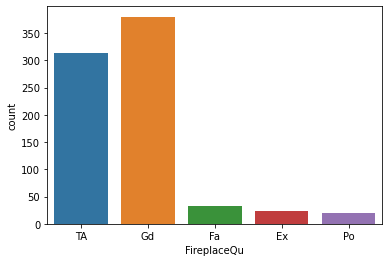

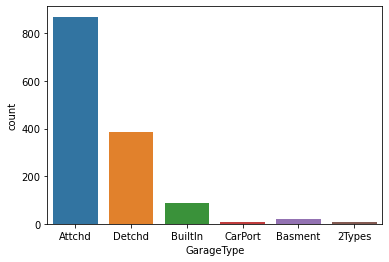

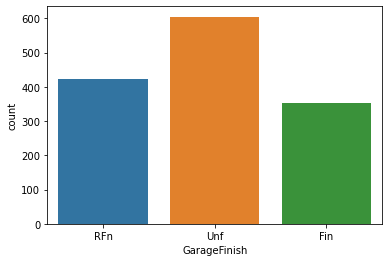

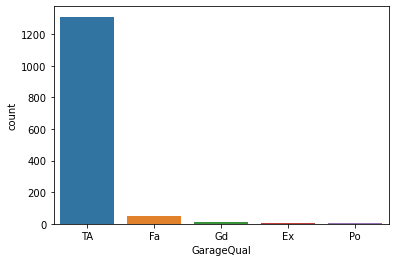

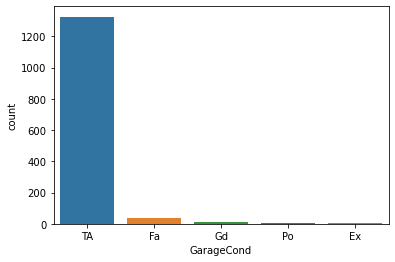

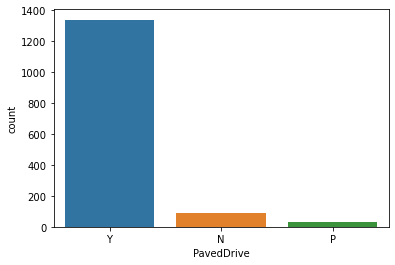

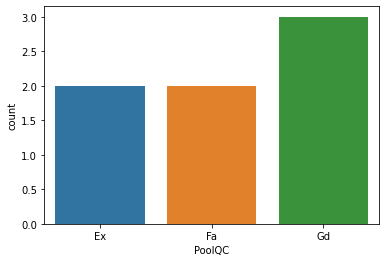

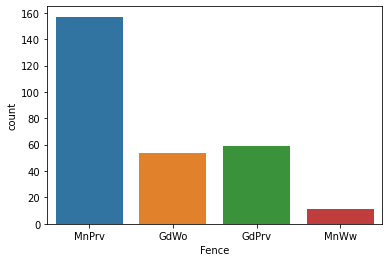

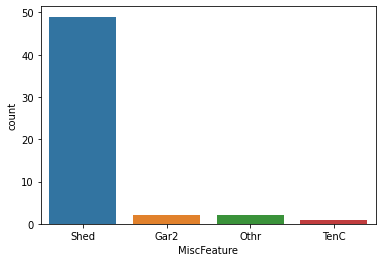

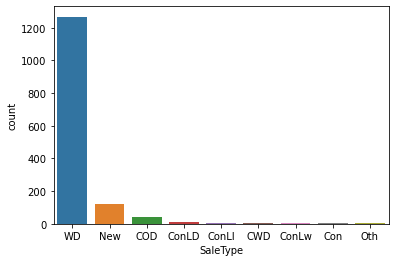

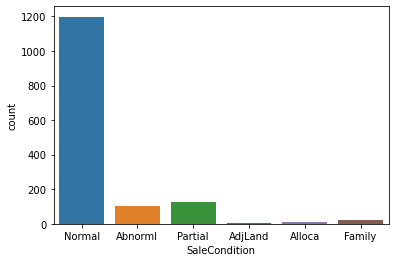

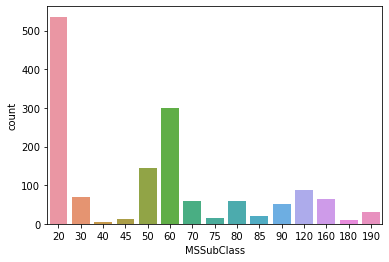

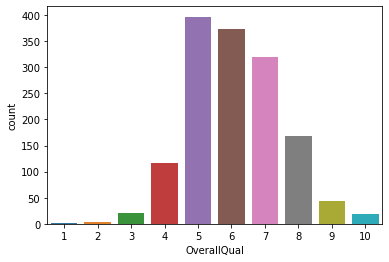

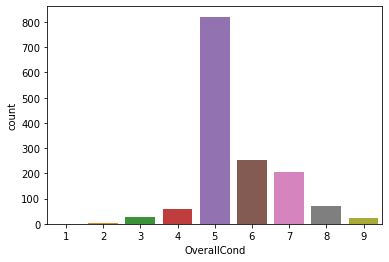

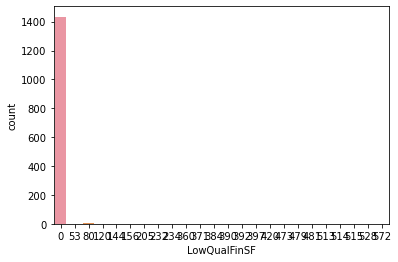

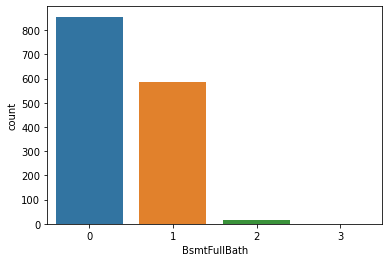

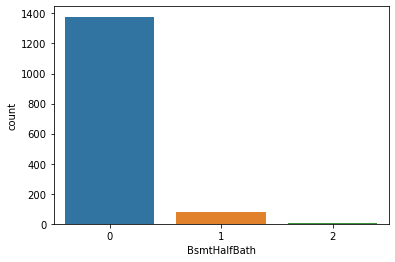

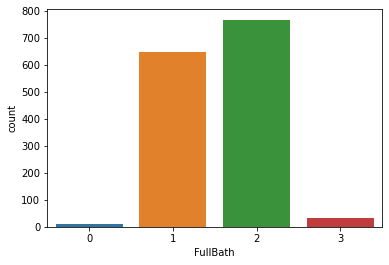

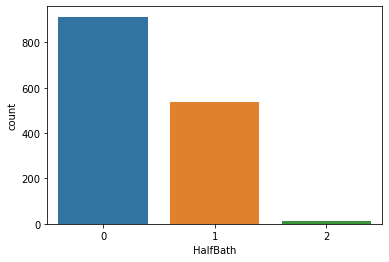

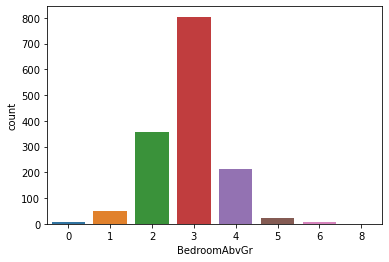

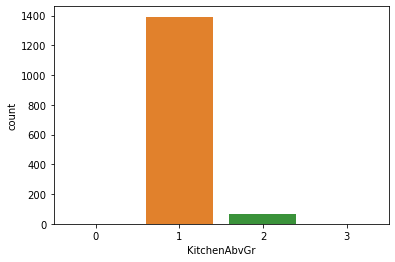

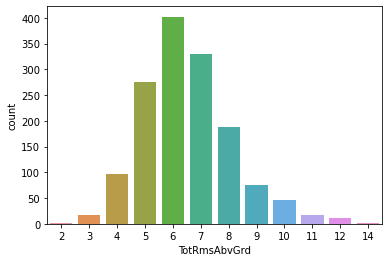

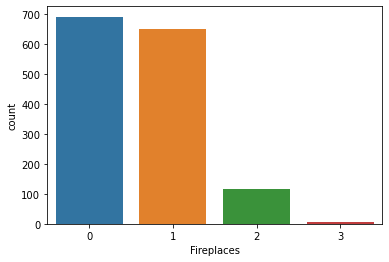

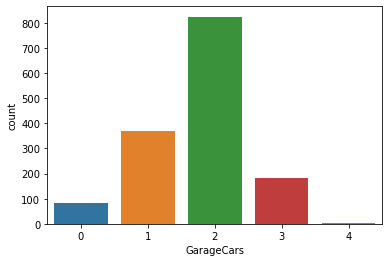

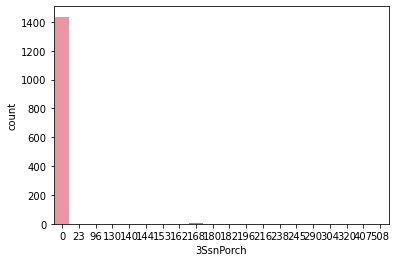

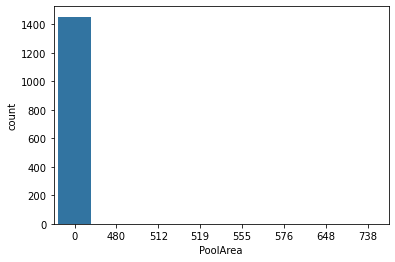

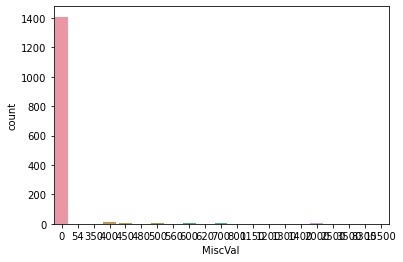

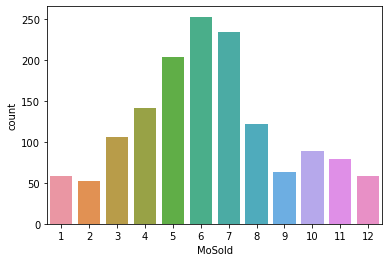

In [33]:
#create count plots for all columns using a for loop
for col in train_cat.columns:
    sns.countplot(x=train_cat[col])
    plt.show()

### Step 4 - EDA on categorical and numerical data

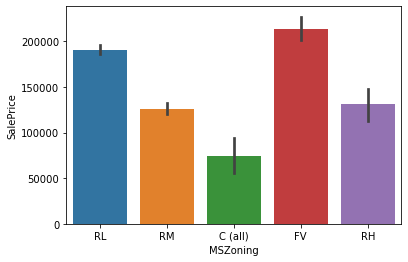

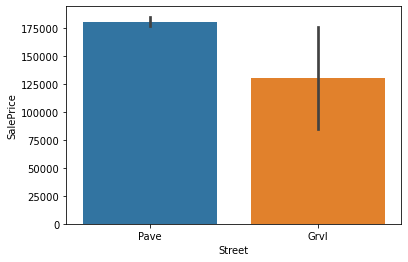

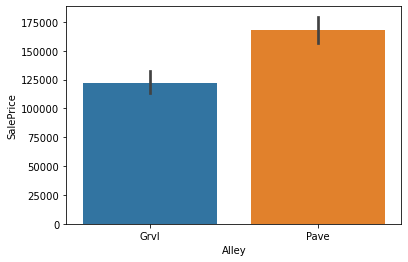

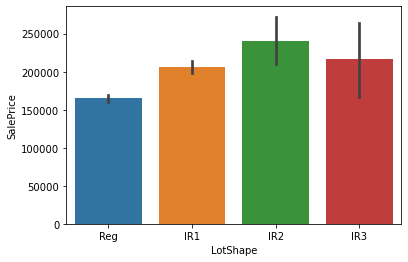

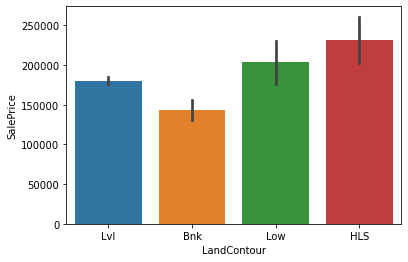

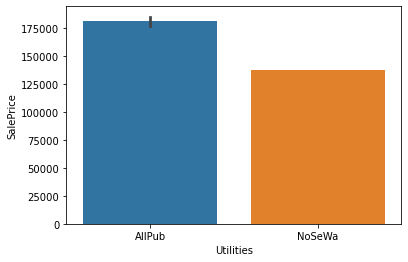

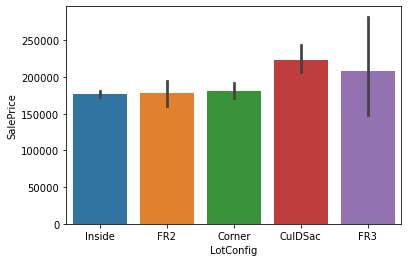

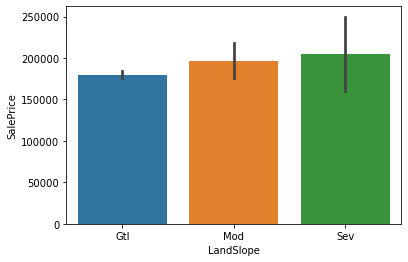

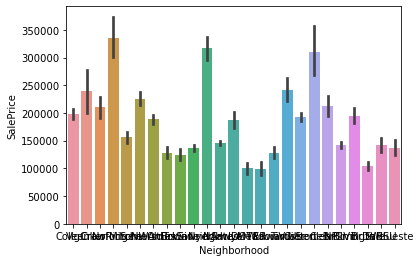

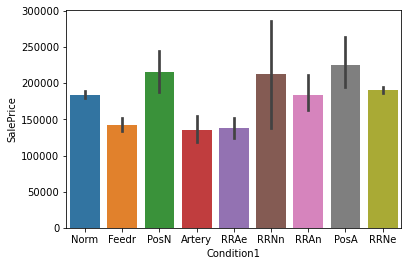

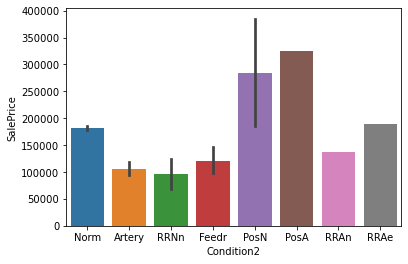

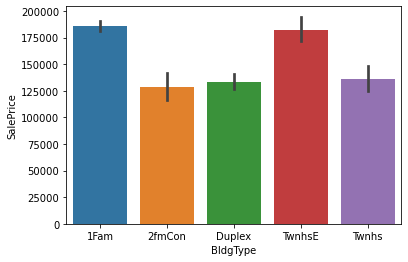

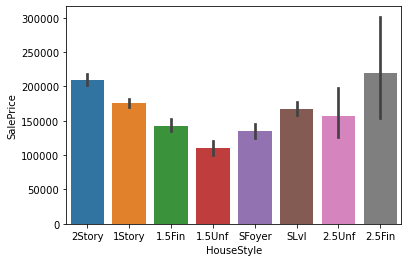

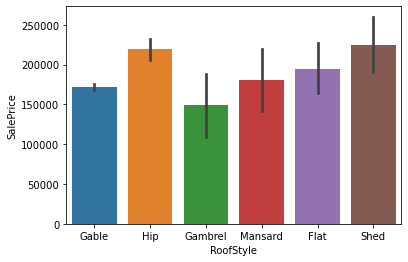

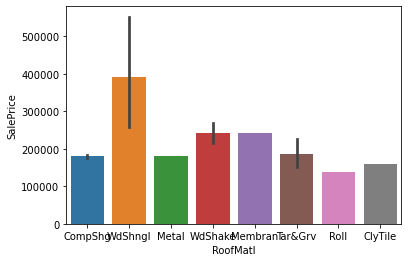

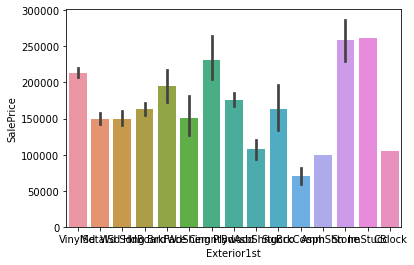

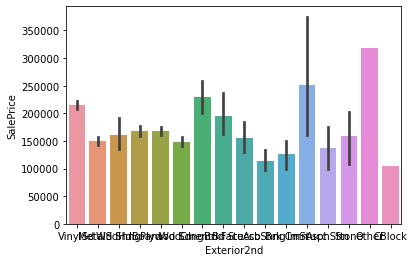

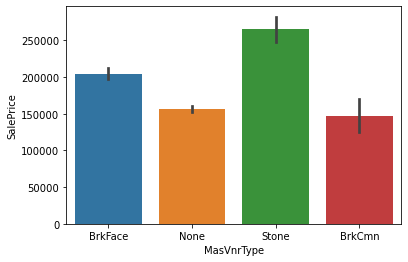

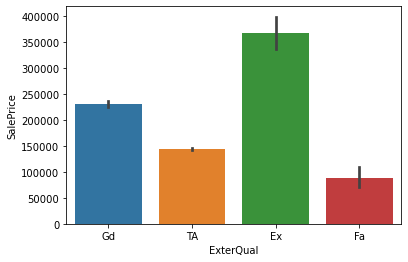

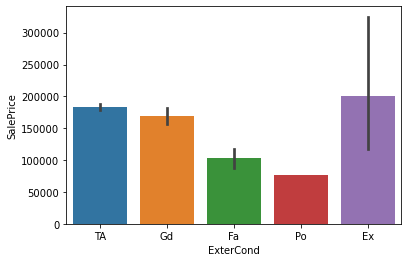

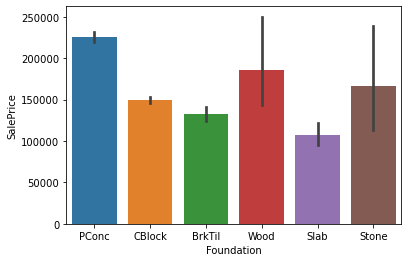

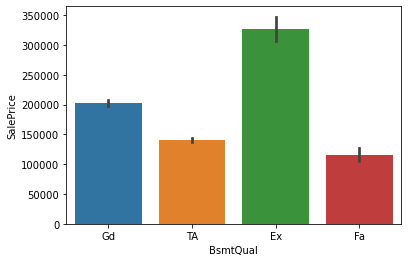

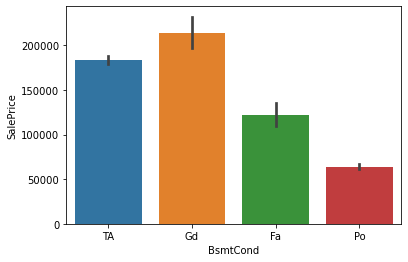

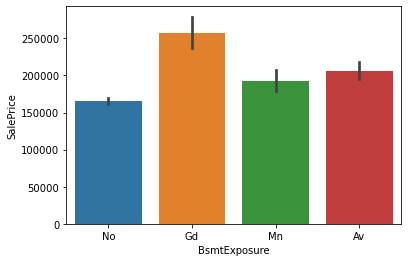

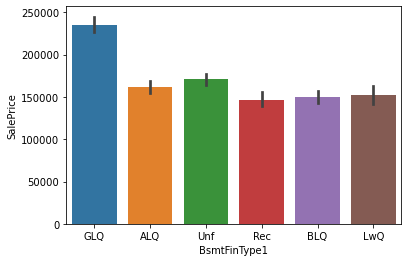

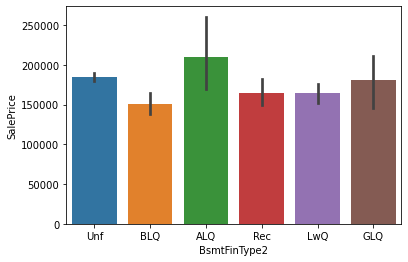

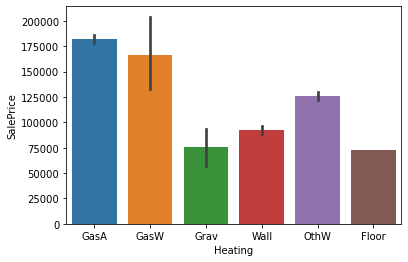

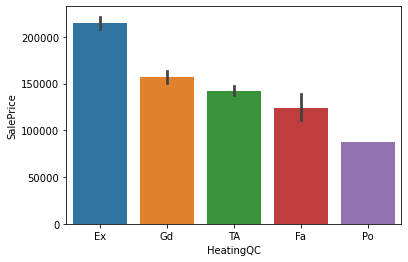

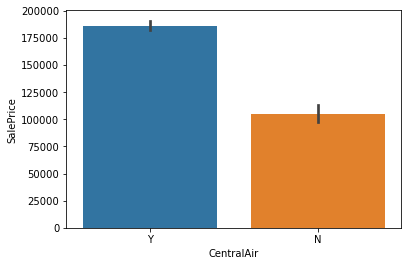

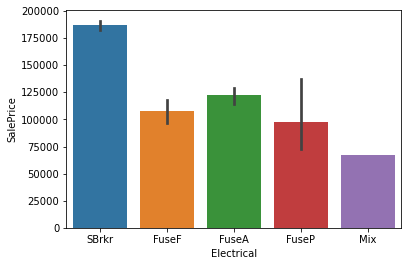

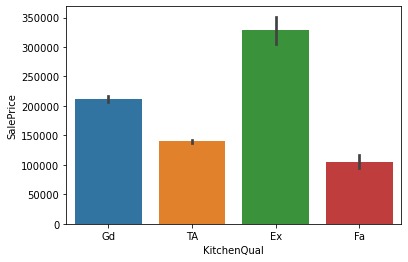

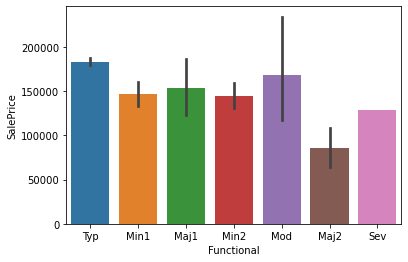

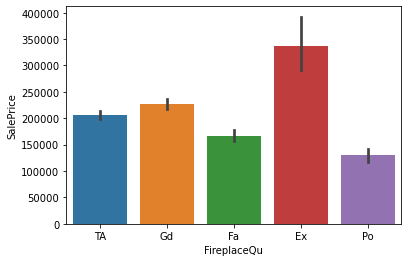

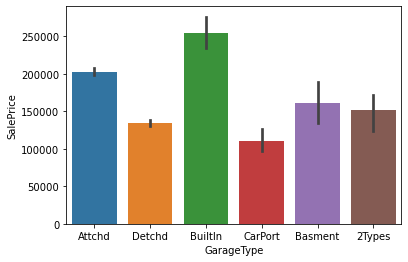

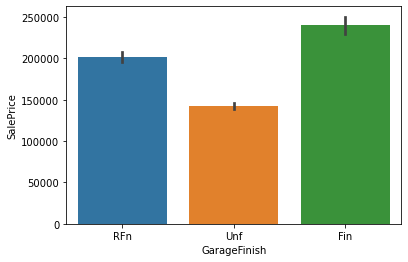

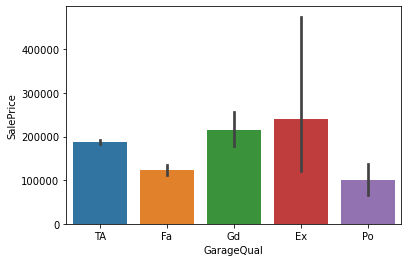

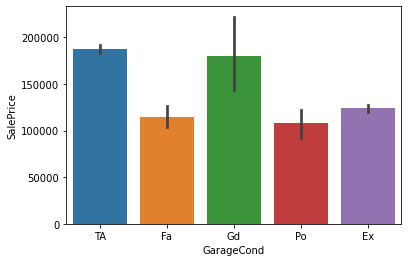

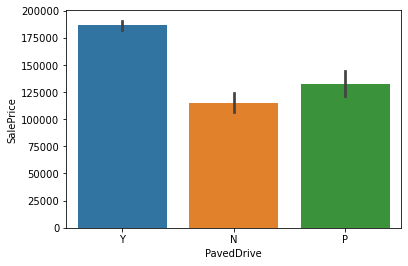

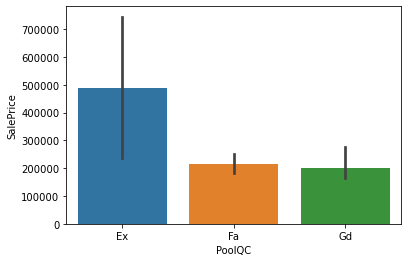

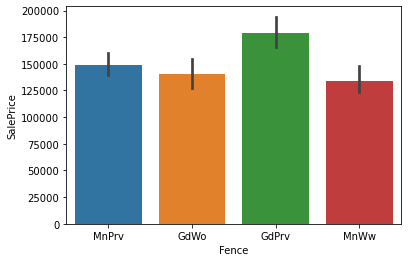

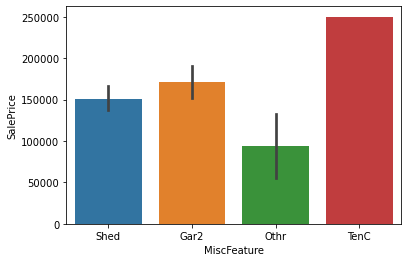

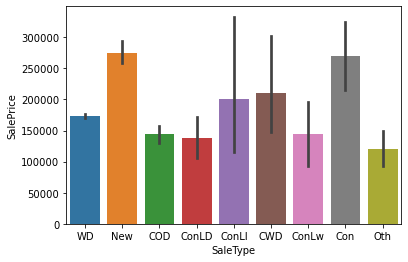

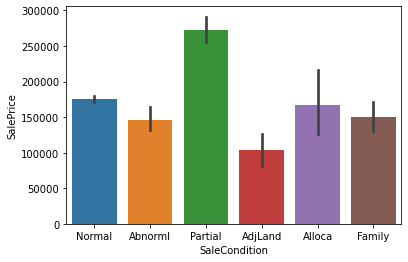

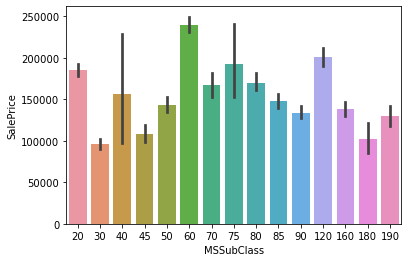

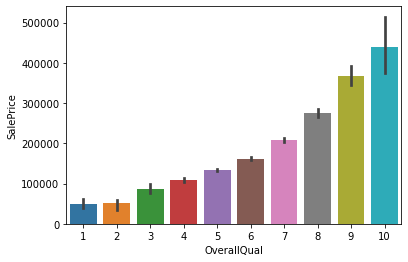

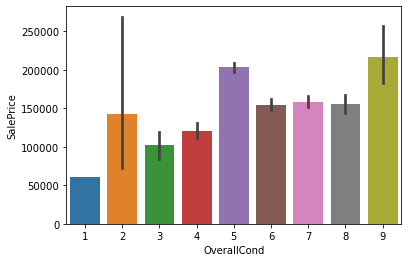

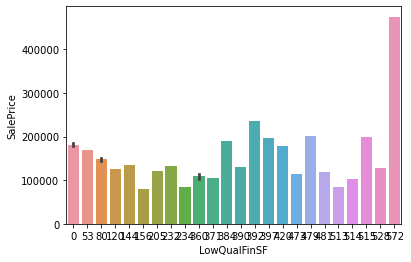

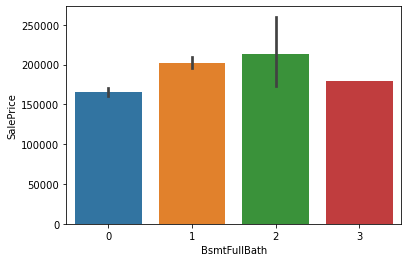

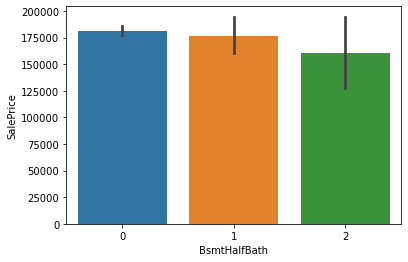

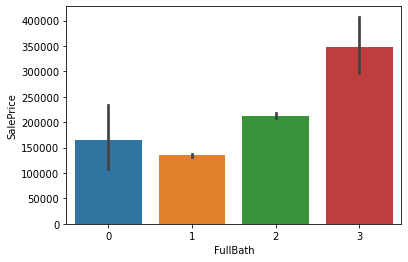

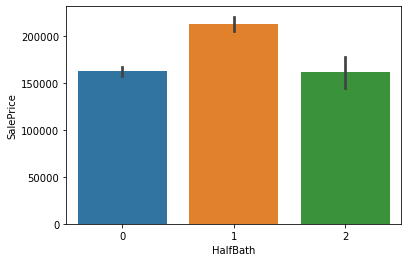

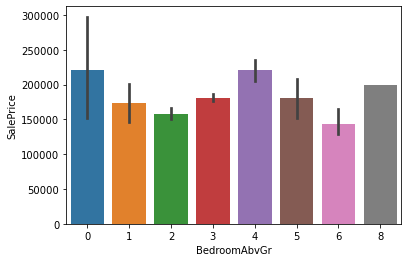

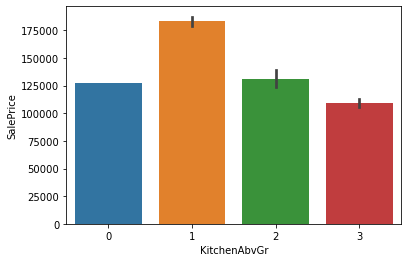

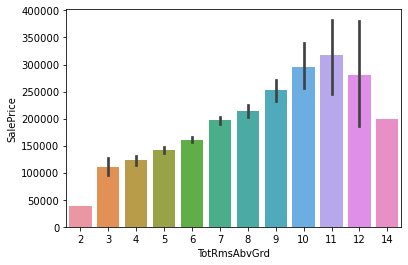

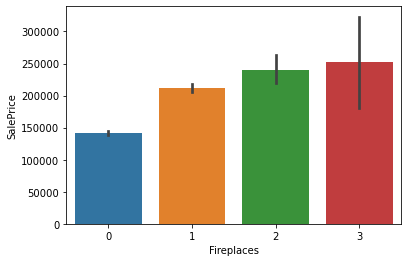

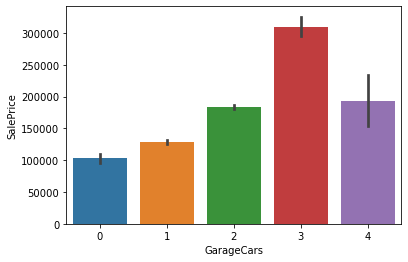

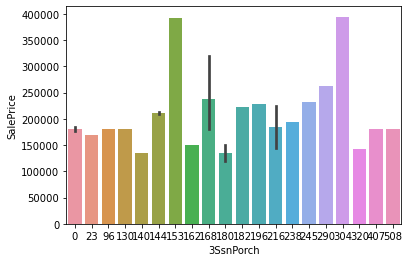

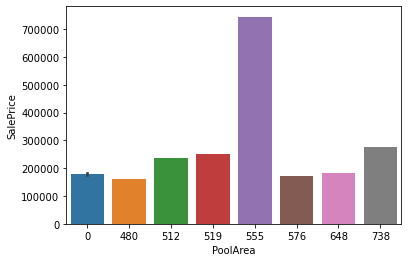

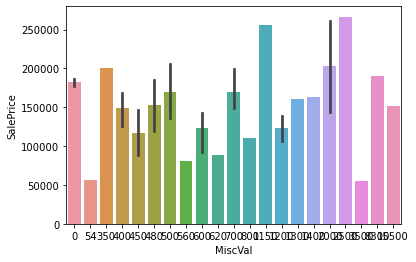

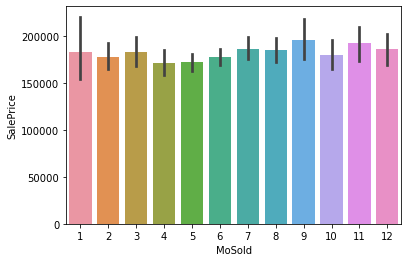

In [34]:
#first check the impact of categorical data on Y variable (sale price)
#to do this, create a bar plot
for col in train_cat.columns:
    sns.barplot(x=train_cat[col],y=train.SalePrice,data=train)
    plt.show()